<a href="https://colab.research.google.com/github/Seungjik-Lee/Python_Deep-Learning/blob/main/Generative_Deep_Learning_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**첫번째 심층신경망**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Flatten, Dense, Conv2D
from keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from keras.datasets import cifar10

데이터 적재

In [ ]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train[54, 12, 13, 1]

170508288/170498071 [==============================] - 4s 0us/step


0.36862746

모델 만들기

In [ ]:
input_layer = Input((32,32,3))

x = Flatten()(input_layer)

x = Dense(200, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)

output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)

model = Model(input_layer, output_layer)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               614600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1510      
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


모델 컴파일

In [ ]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


모델 훈련

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)


Epoch 1/10
1563/1563 [==============================] - 25s 6ms/step - loss: 1.9592 - accuracy: 0.2856
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6831 - accuracy: 0.4003
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5853 - accuracy: 0.4364
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5174 - accuracy: 0.4572
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4843 - accuracy: 0.4681
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4522 - accuracy: 0.4854
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4256 - accuracy: 0.4925
Epoch 8/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4020 - accuracy: 0.5055
Epoch 9/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3839 - accuracy: 0.5076
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

모델 평가

313/313 [==============================] - 1s 2ms/step - loss: 1.4738 - accuracy: 0.4749


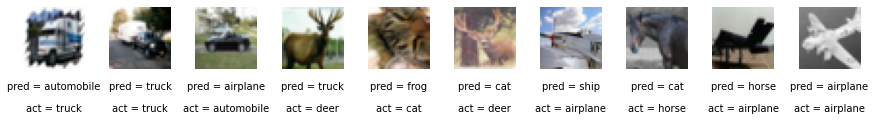

In [ ]:
model.evaluate(x_test, y_test)

CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)